# Mintun1984 for Twilite and Image-Derived Input Functions

## Setup

In [1]:
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

from Mintun1984Context import Mintun1984Context
%matplotlib inline
# from matplotlib import pyplot as plt

In [3]:
# everything is decay corrected
kerndir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "kernels")
kern = os.path.join(kerndir, "kernel_hct=46.8.nii.gz")

oo1dir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421150523", "pet")
idif = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
twil = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
pet = os.path.join(oo1dir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

hodir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421152358", "pet")
ks_idif = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Boxcar-main7-rc1p85-vrc1-3000-qm.nii.gz")
ks_twil = os.path.join(oo1dir, "sub-108293_ses-20210421152358_trc-ho_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-schaeffer-Raichle1983Artery-main7-rc1p85-vrc1-3000-qm.nii.gz")

codir = os.path.join(os.getenv("HOME"), "PycharmProjects", "dynesty", "idif2024", "data", "ses-20210421144815", "pet")
v1_idif = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-idif_martinv1.nii.gz")
v1_twil = os.path.join(codir, "sub-108293_ses-20210421144815_trc-co_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames-ParcSchaeffer-reshape-to-schaeffer-schaeffer-twilite_martinv1.nii.gz")

data_dict_idif = {
    "input_func_fqfn": idif,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_idif,
    "ks_fqfn": ks_idif,
    "nlive": 1000,
    "tag": "playground_mintun1984_idif"
}
data_dict_twil = {
    "kernel_fqfn": kern,
    "input_func_fqfn": twil,
    "tissue_fqfn": pet,
    "v1_fqfn": v1_twil,
    "ks_fqfn": ks_twil,
    "nlive": 1000,
    "tag": "playground_mintun1984_twil"
}

truth_idif = [2.02266859e-01, 1.30503331e+00, 7.19494722e-01, 1.00390665e+01, 9.82339382e+00, 1.74320833e+01, 1.72211248e-02]
truth_twil = [0.51932539, 0.68335921, 0.70828213, 4.55715122, 3.82516299, 6.14729027, 0.03415969]
mm_idif = Mintun1984Context(data_dict_idif)
mm_twil = Mintun1984Context(data_dict_twil)

parc_index = 25

## Inspect Mintun1984Context twil

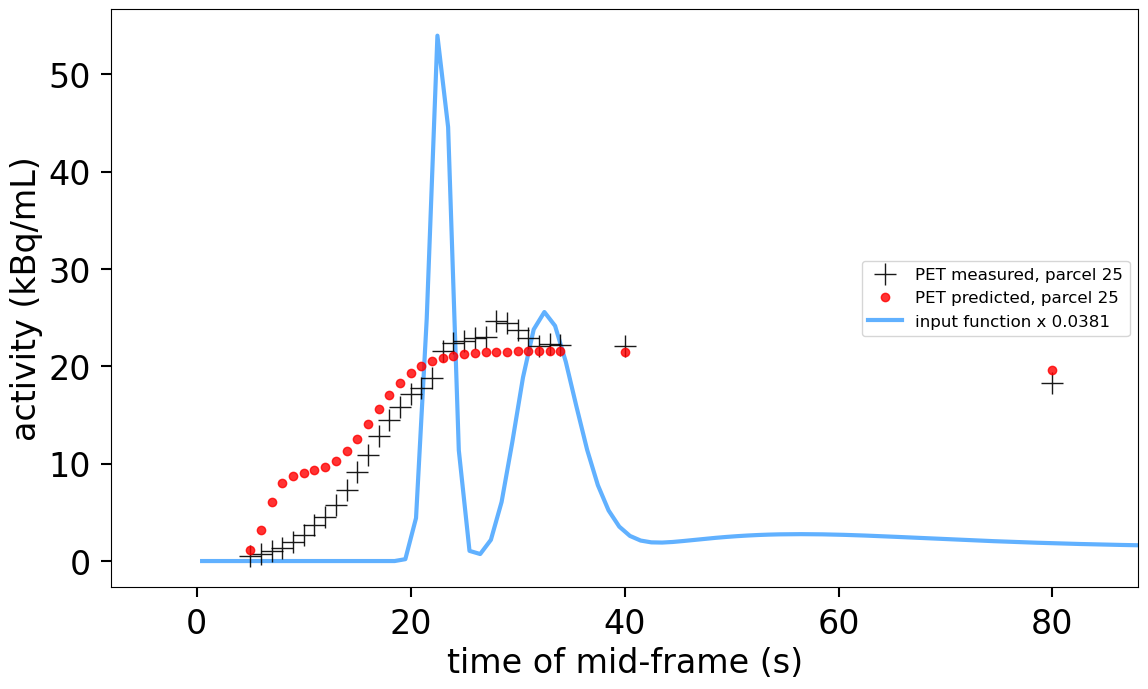

In [4]:
mm_twil.plotting.truths_plot(truths=truth_twil, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [5]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.solver.run_nested(print_progress=True, parc_index=range(10))

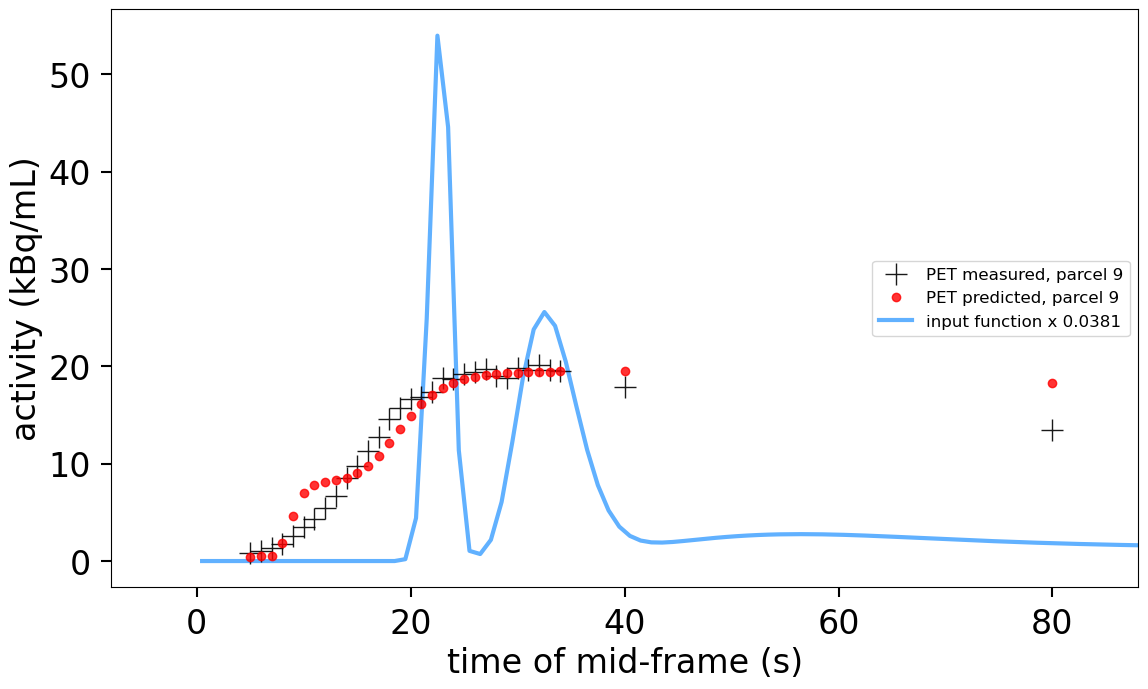

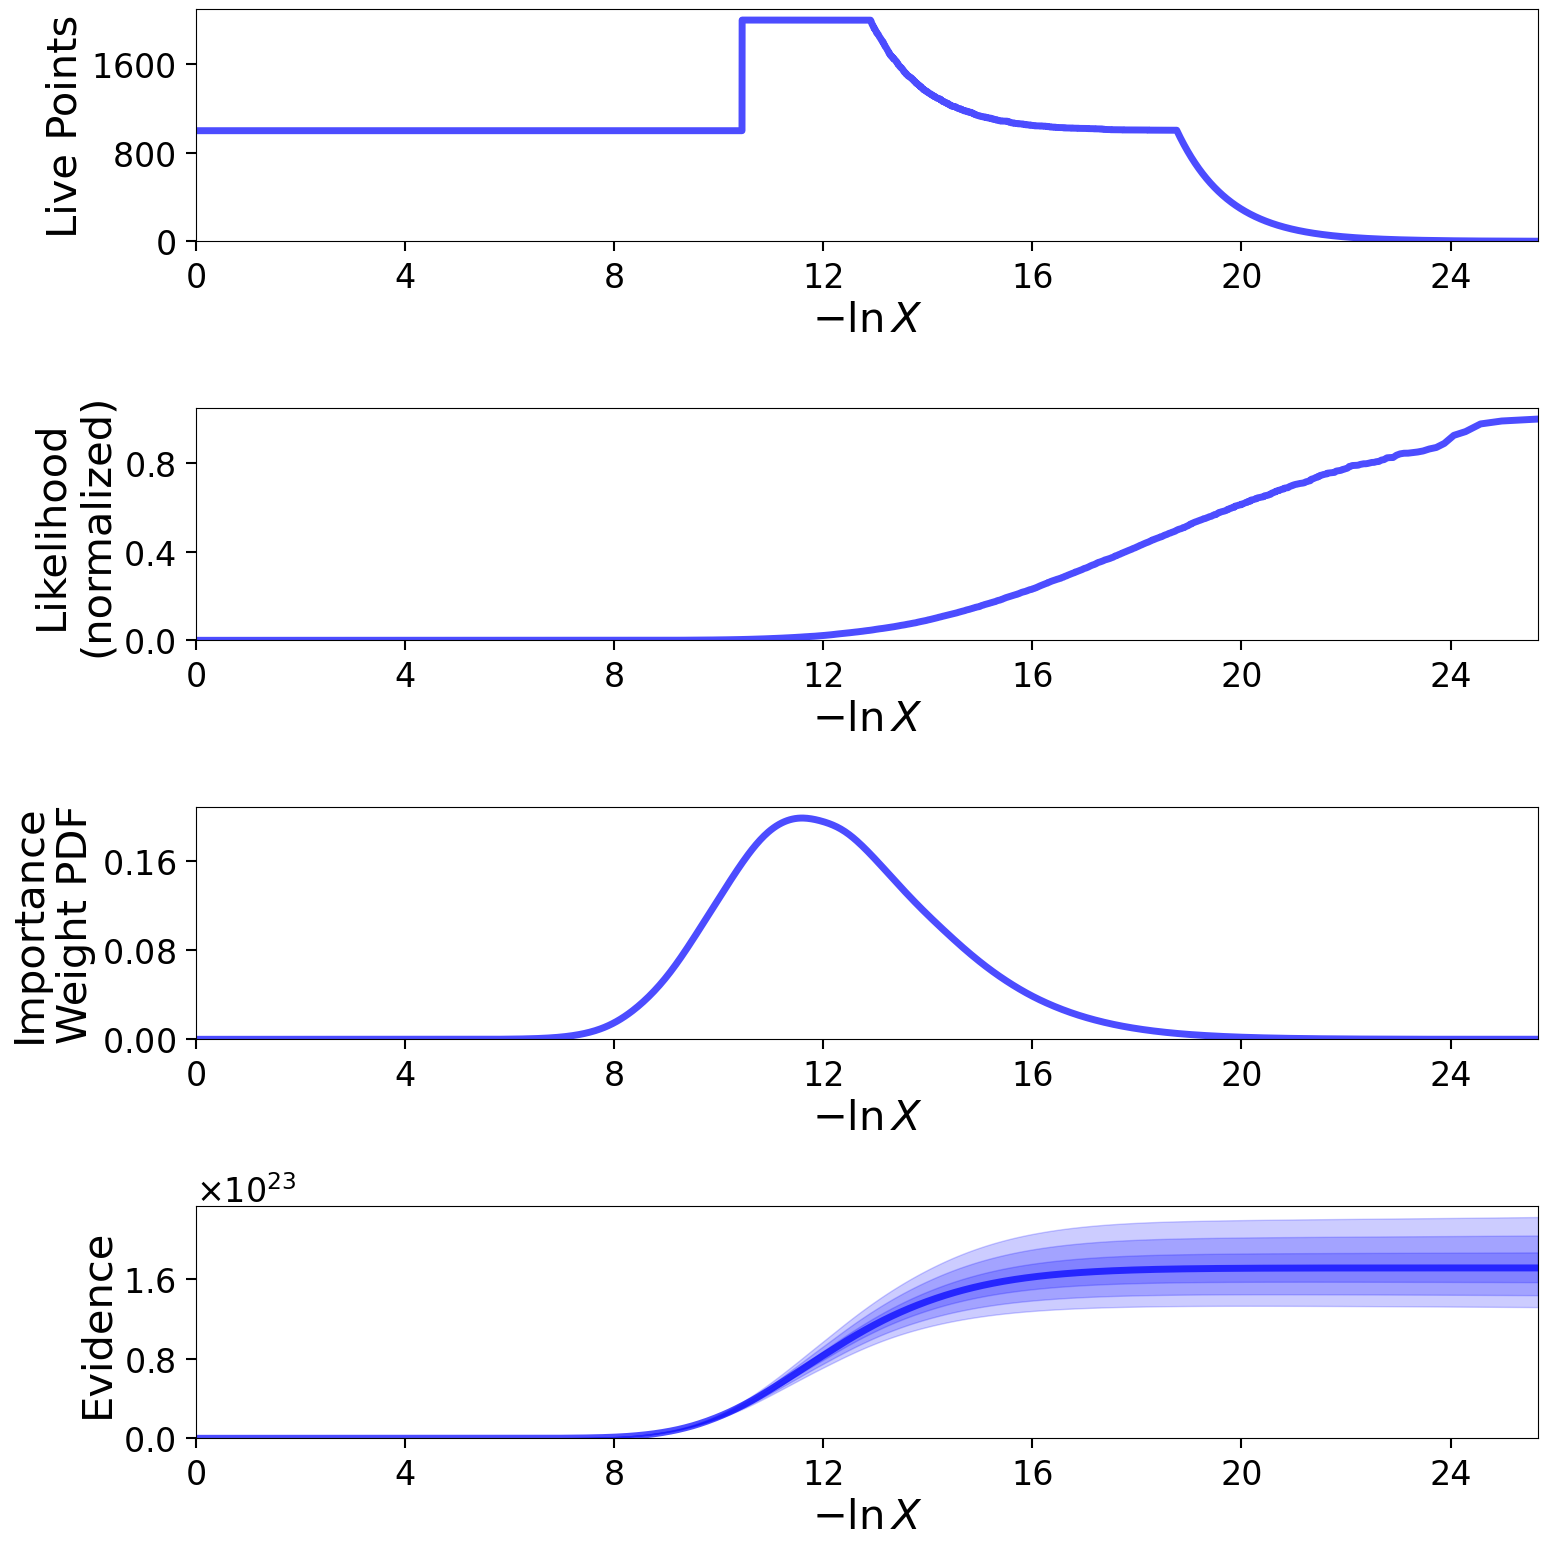

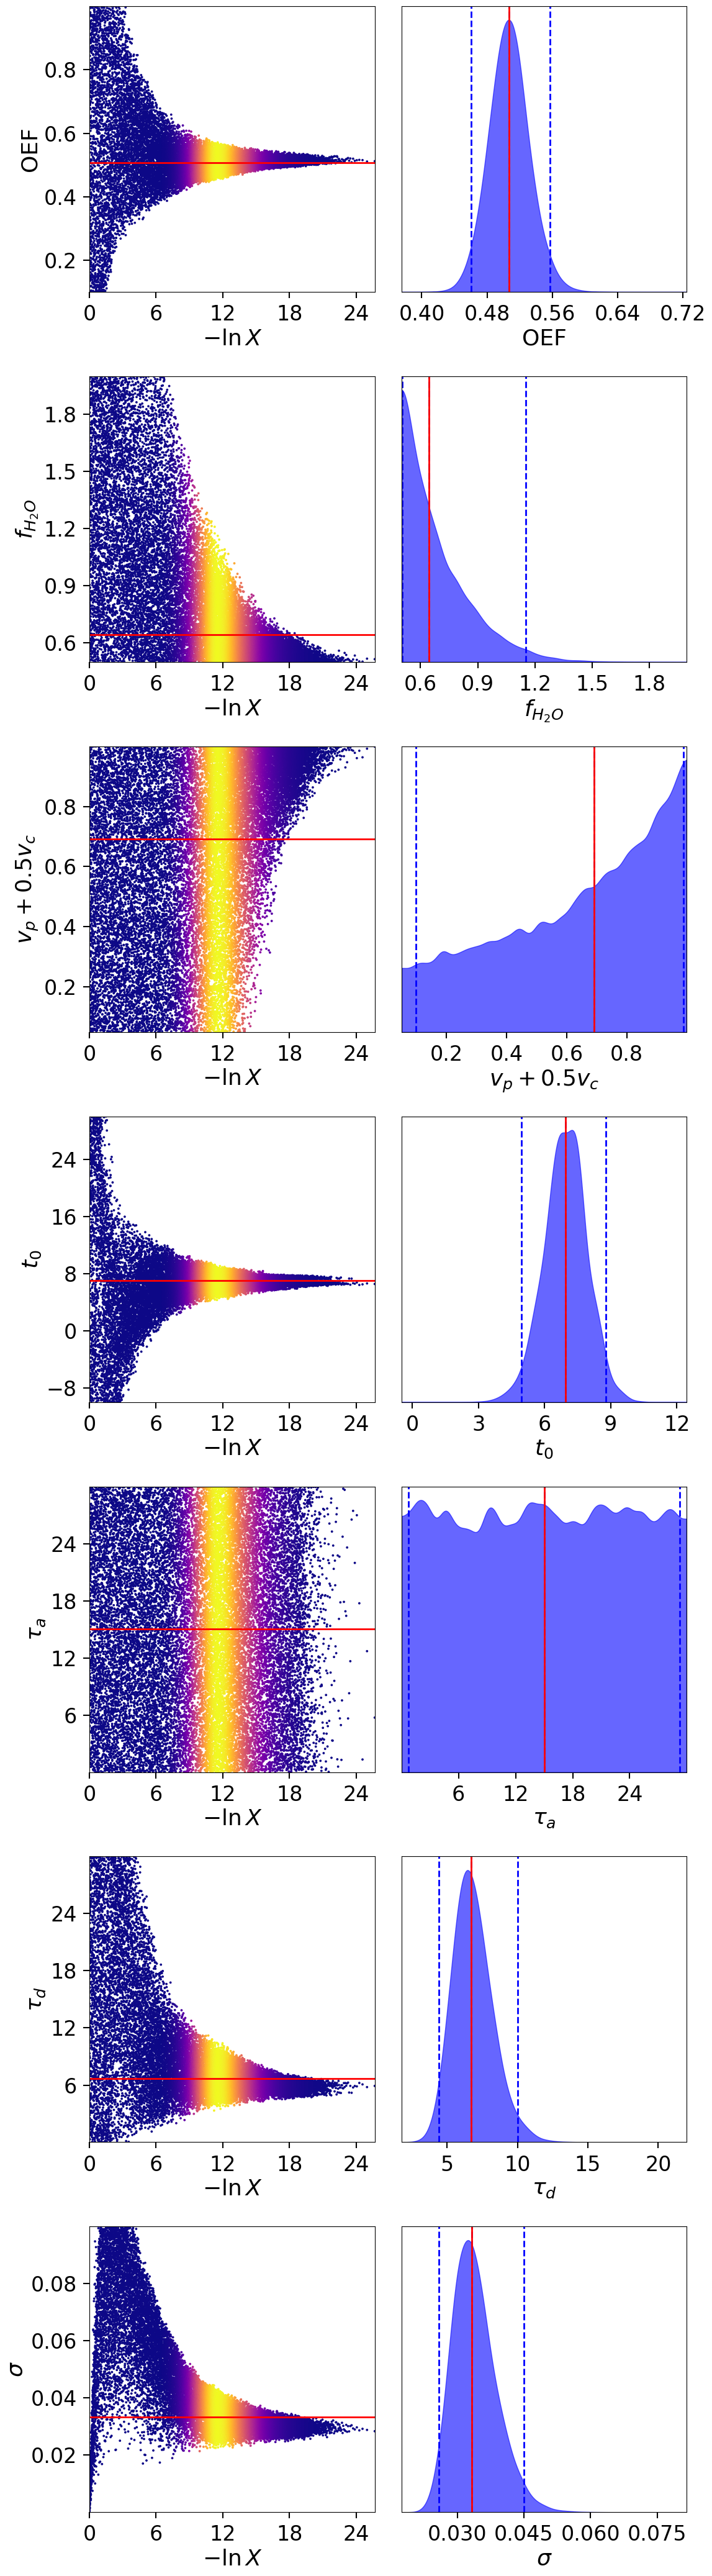

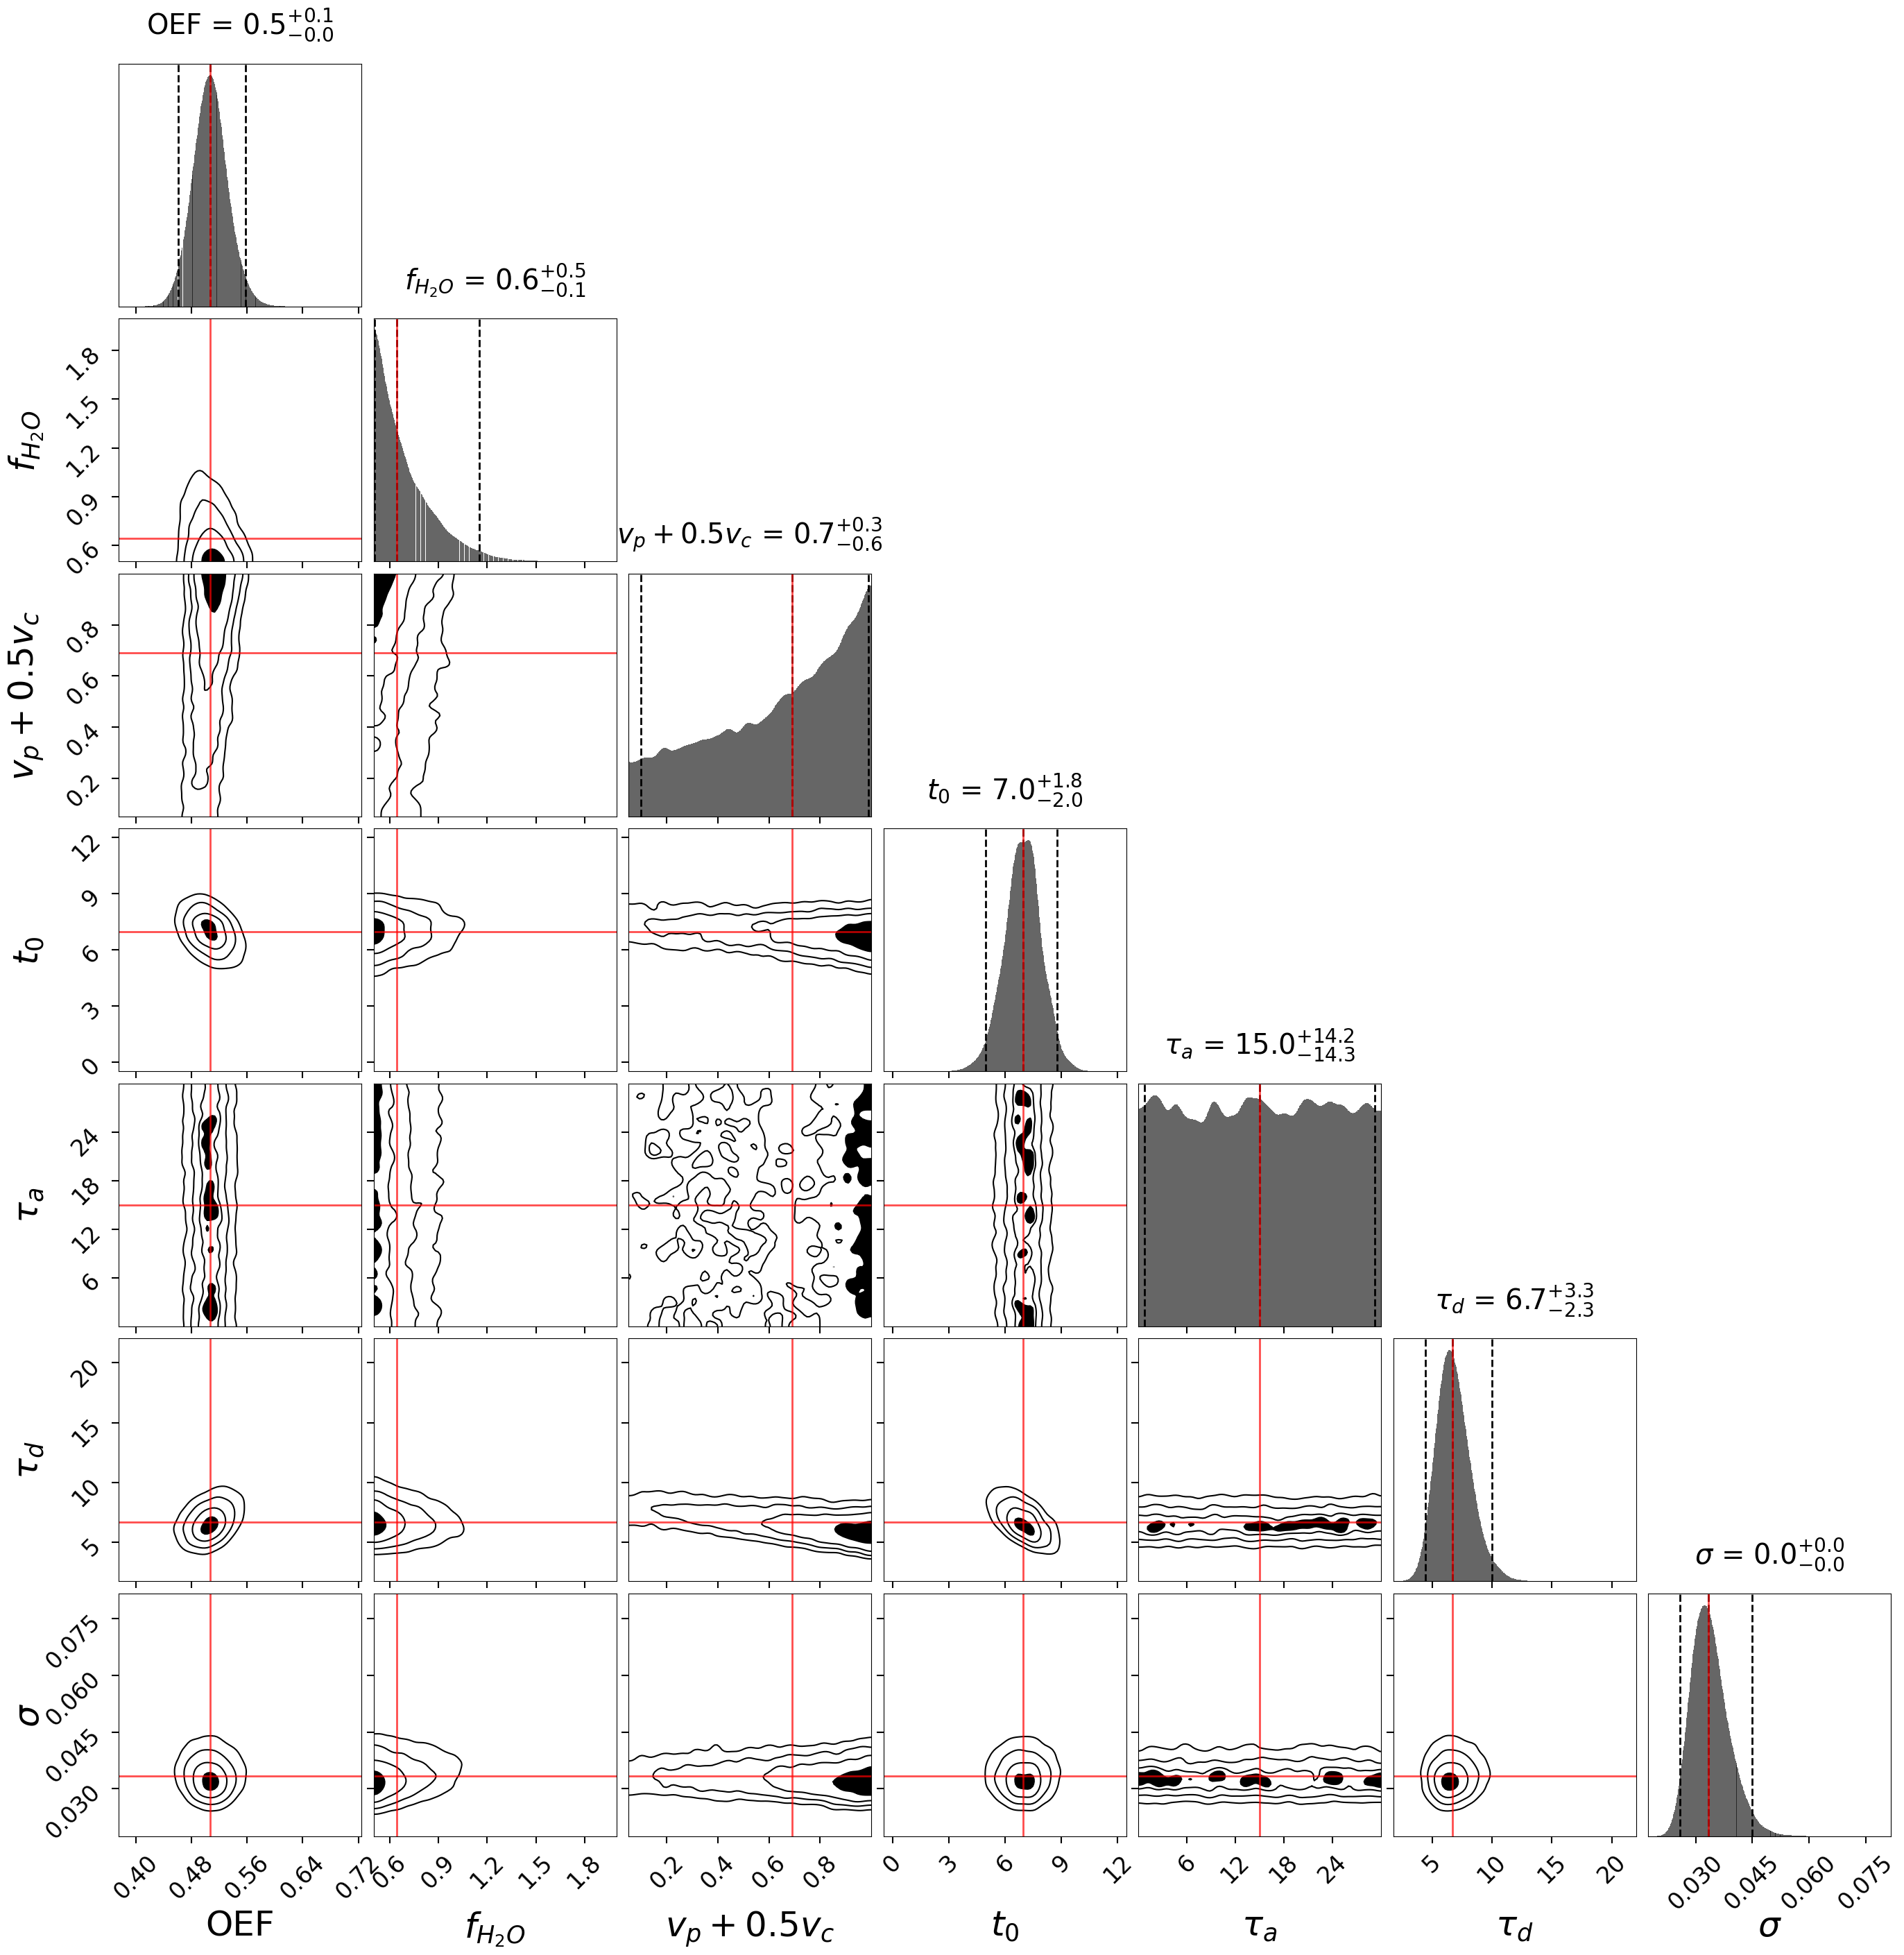

In [6]:
mm_twil.plotting.results_plot(tag="playground_mintun1984_twil", parc_index=9)

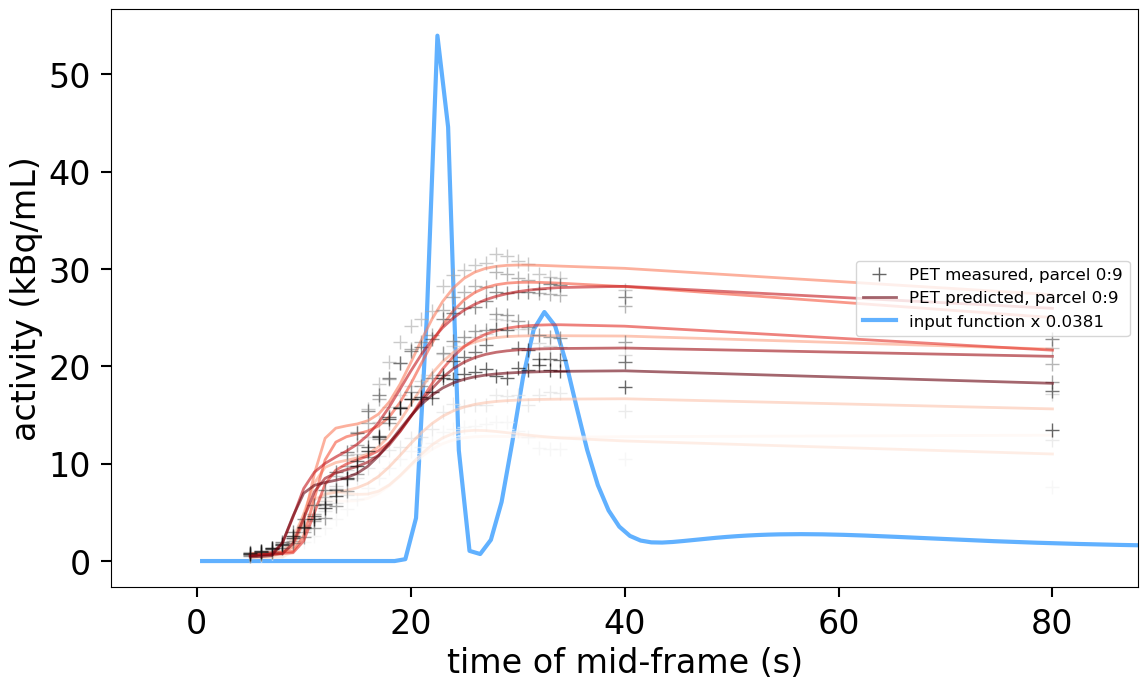

In [7]:
mm_twil.plotting.parcs_plot()

## Inspect Mintun1984Context idif

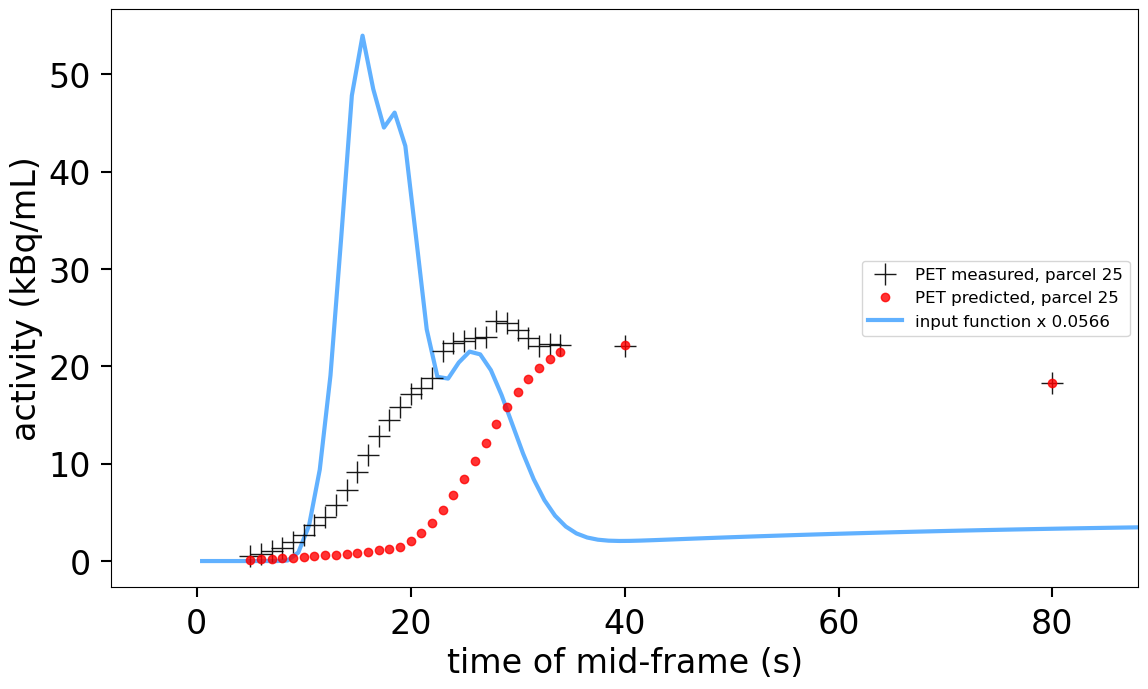

In [8]:
mm_idif.plotting.truths_plot(truths=truth_idif, parc_index=parc_index)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

In [9]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.solver.run_nested(print_progress=True, parc_index=range(10))

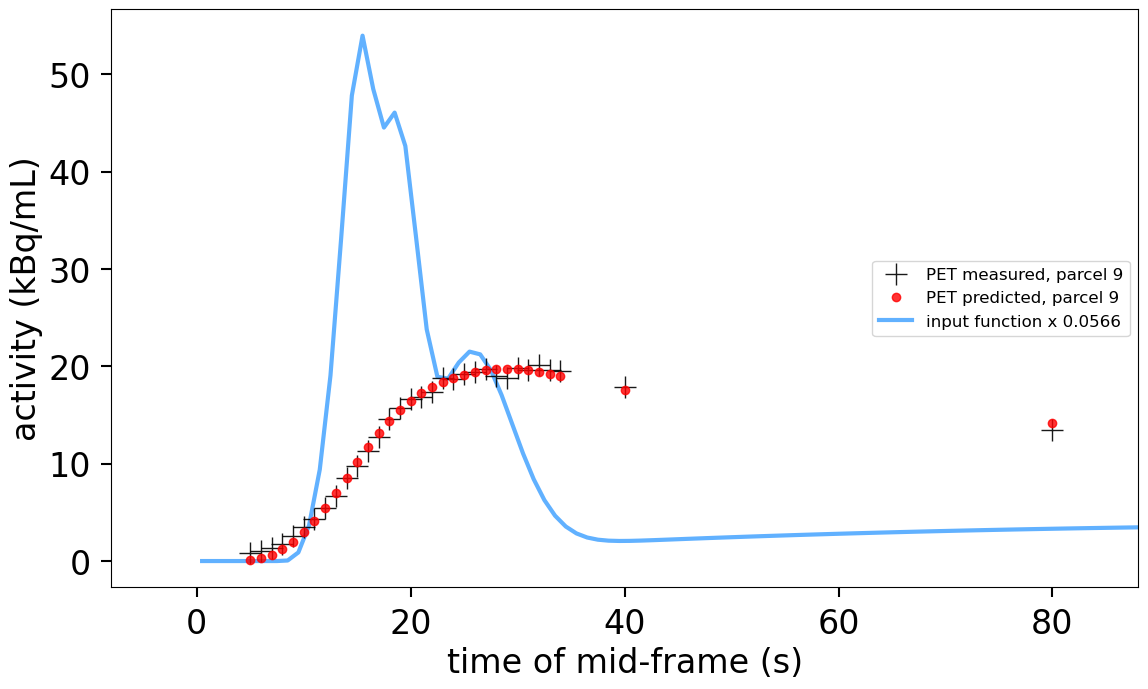

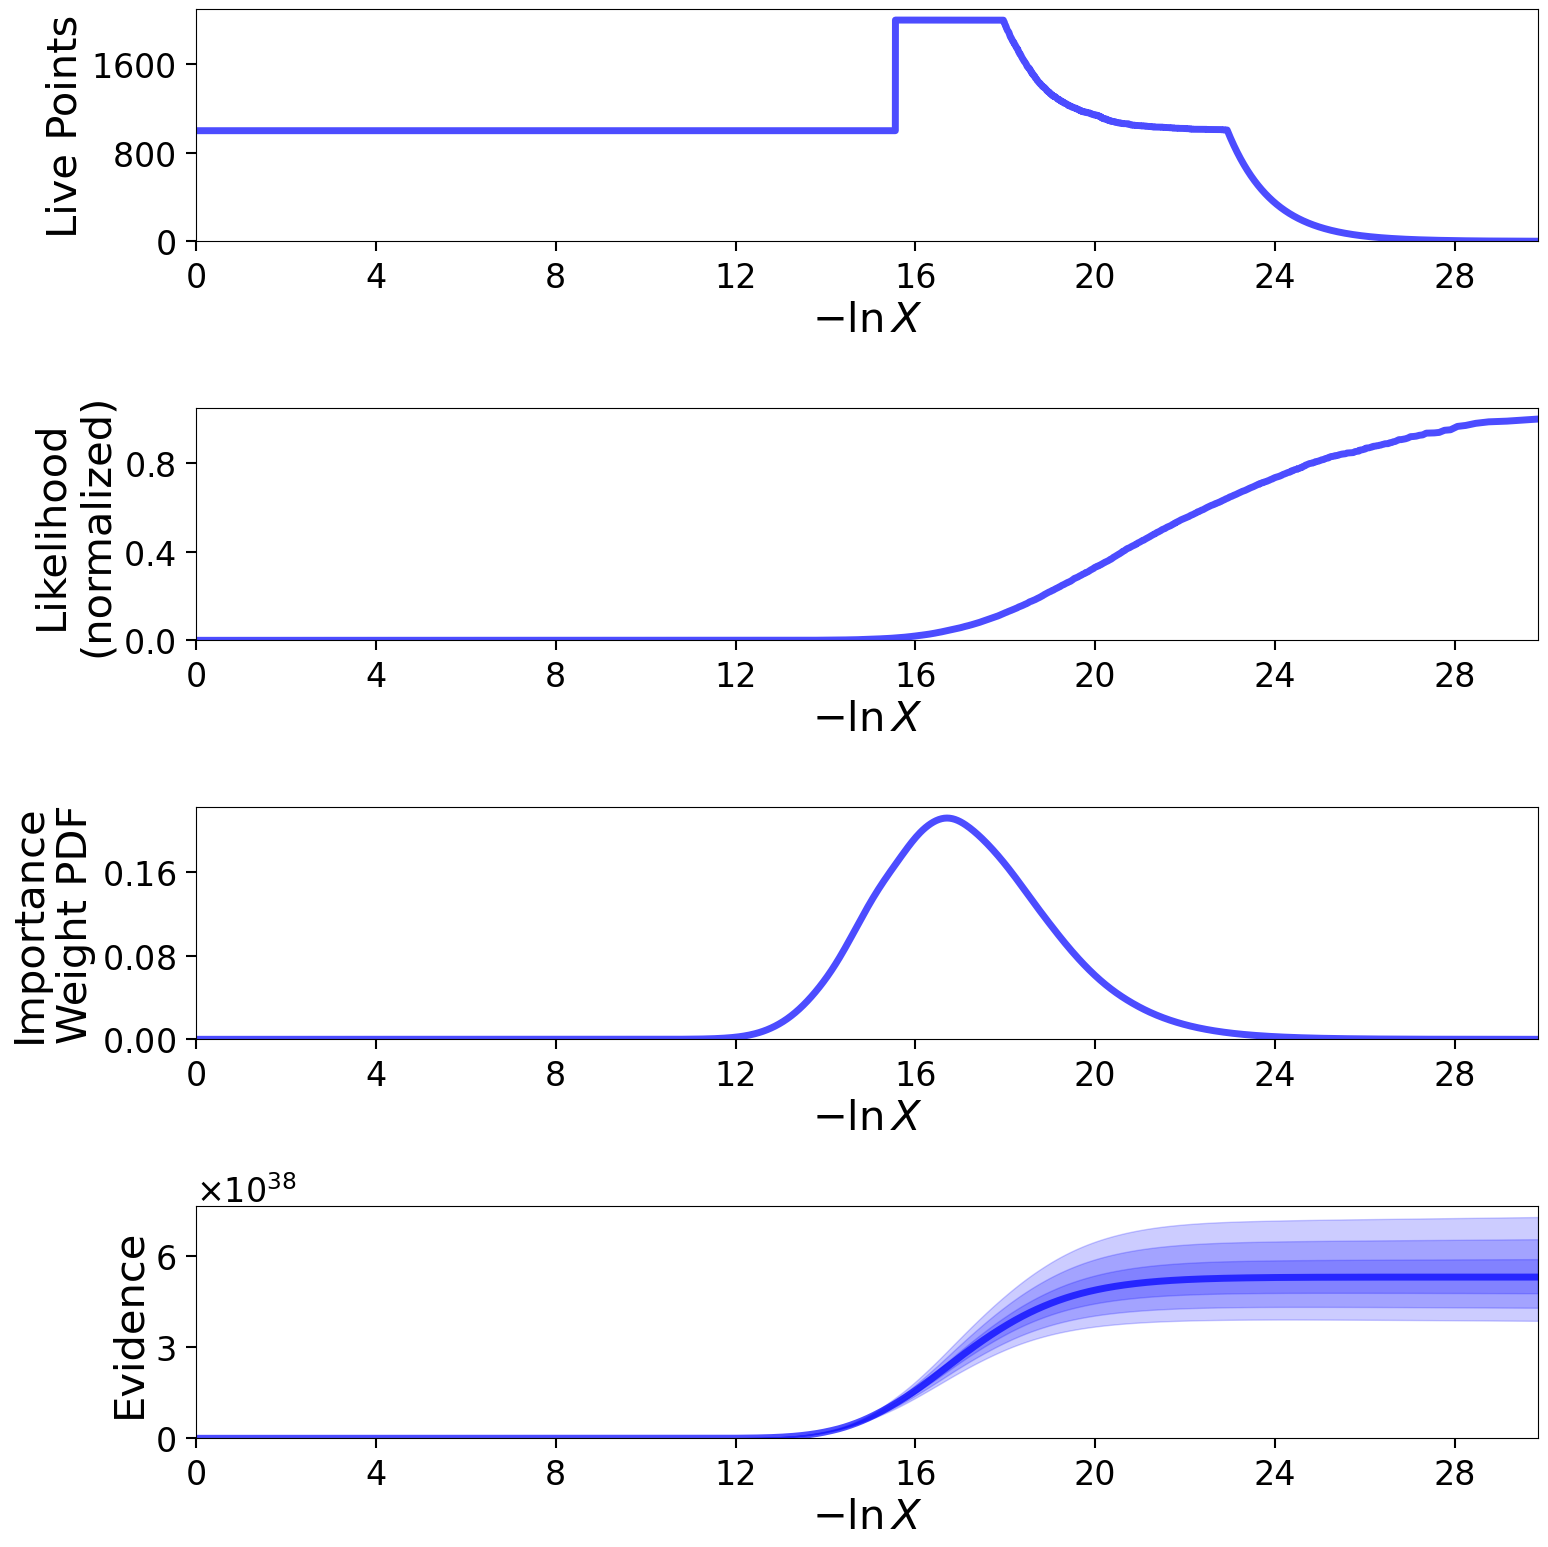

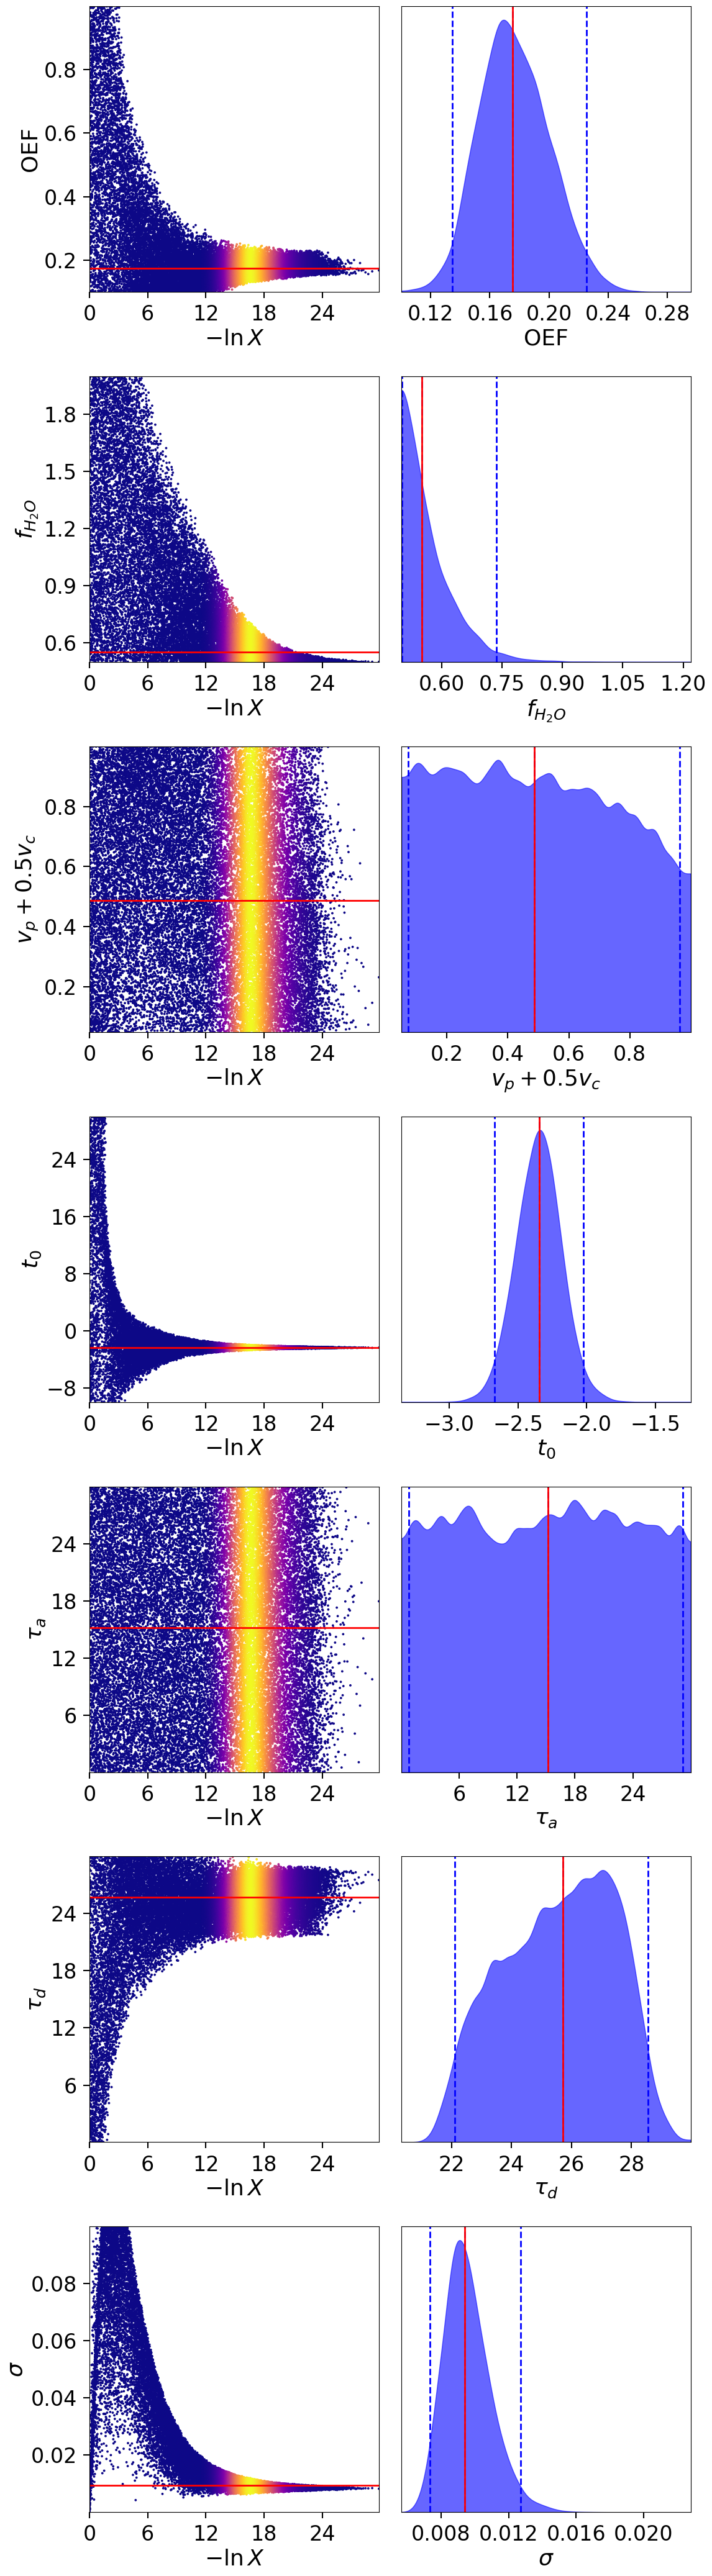

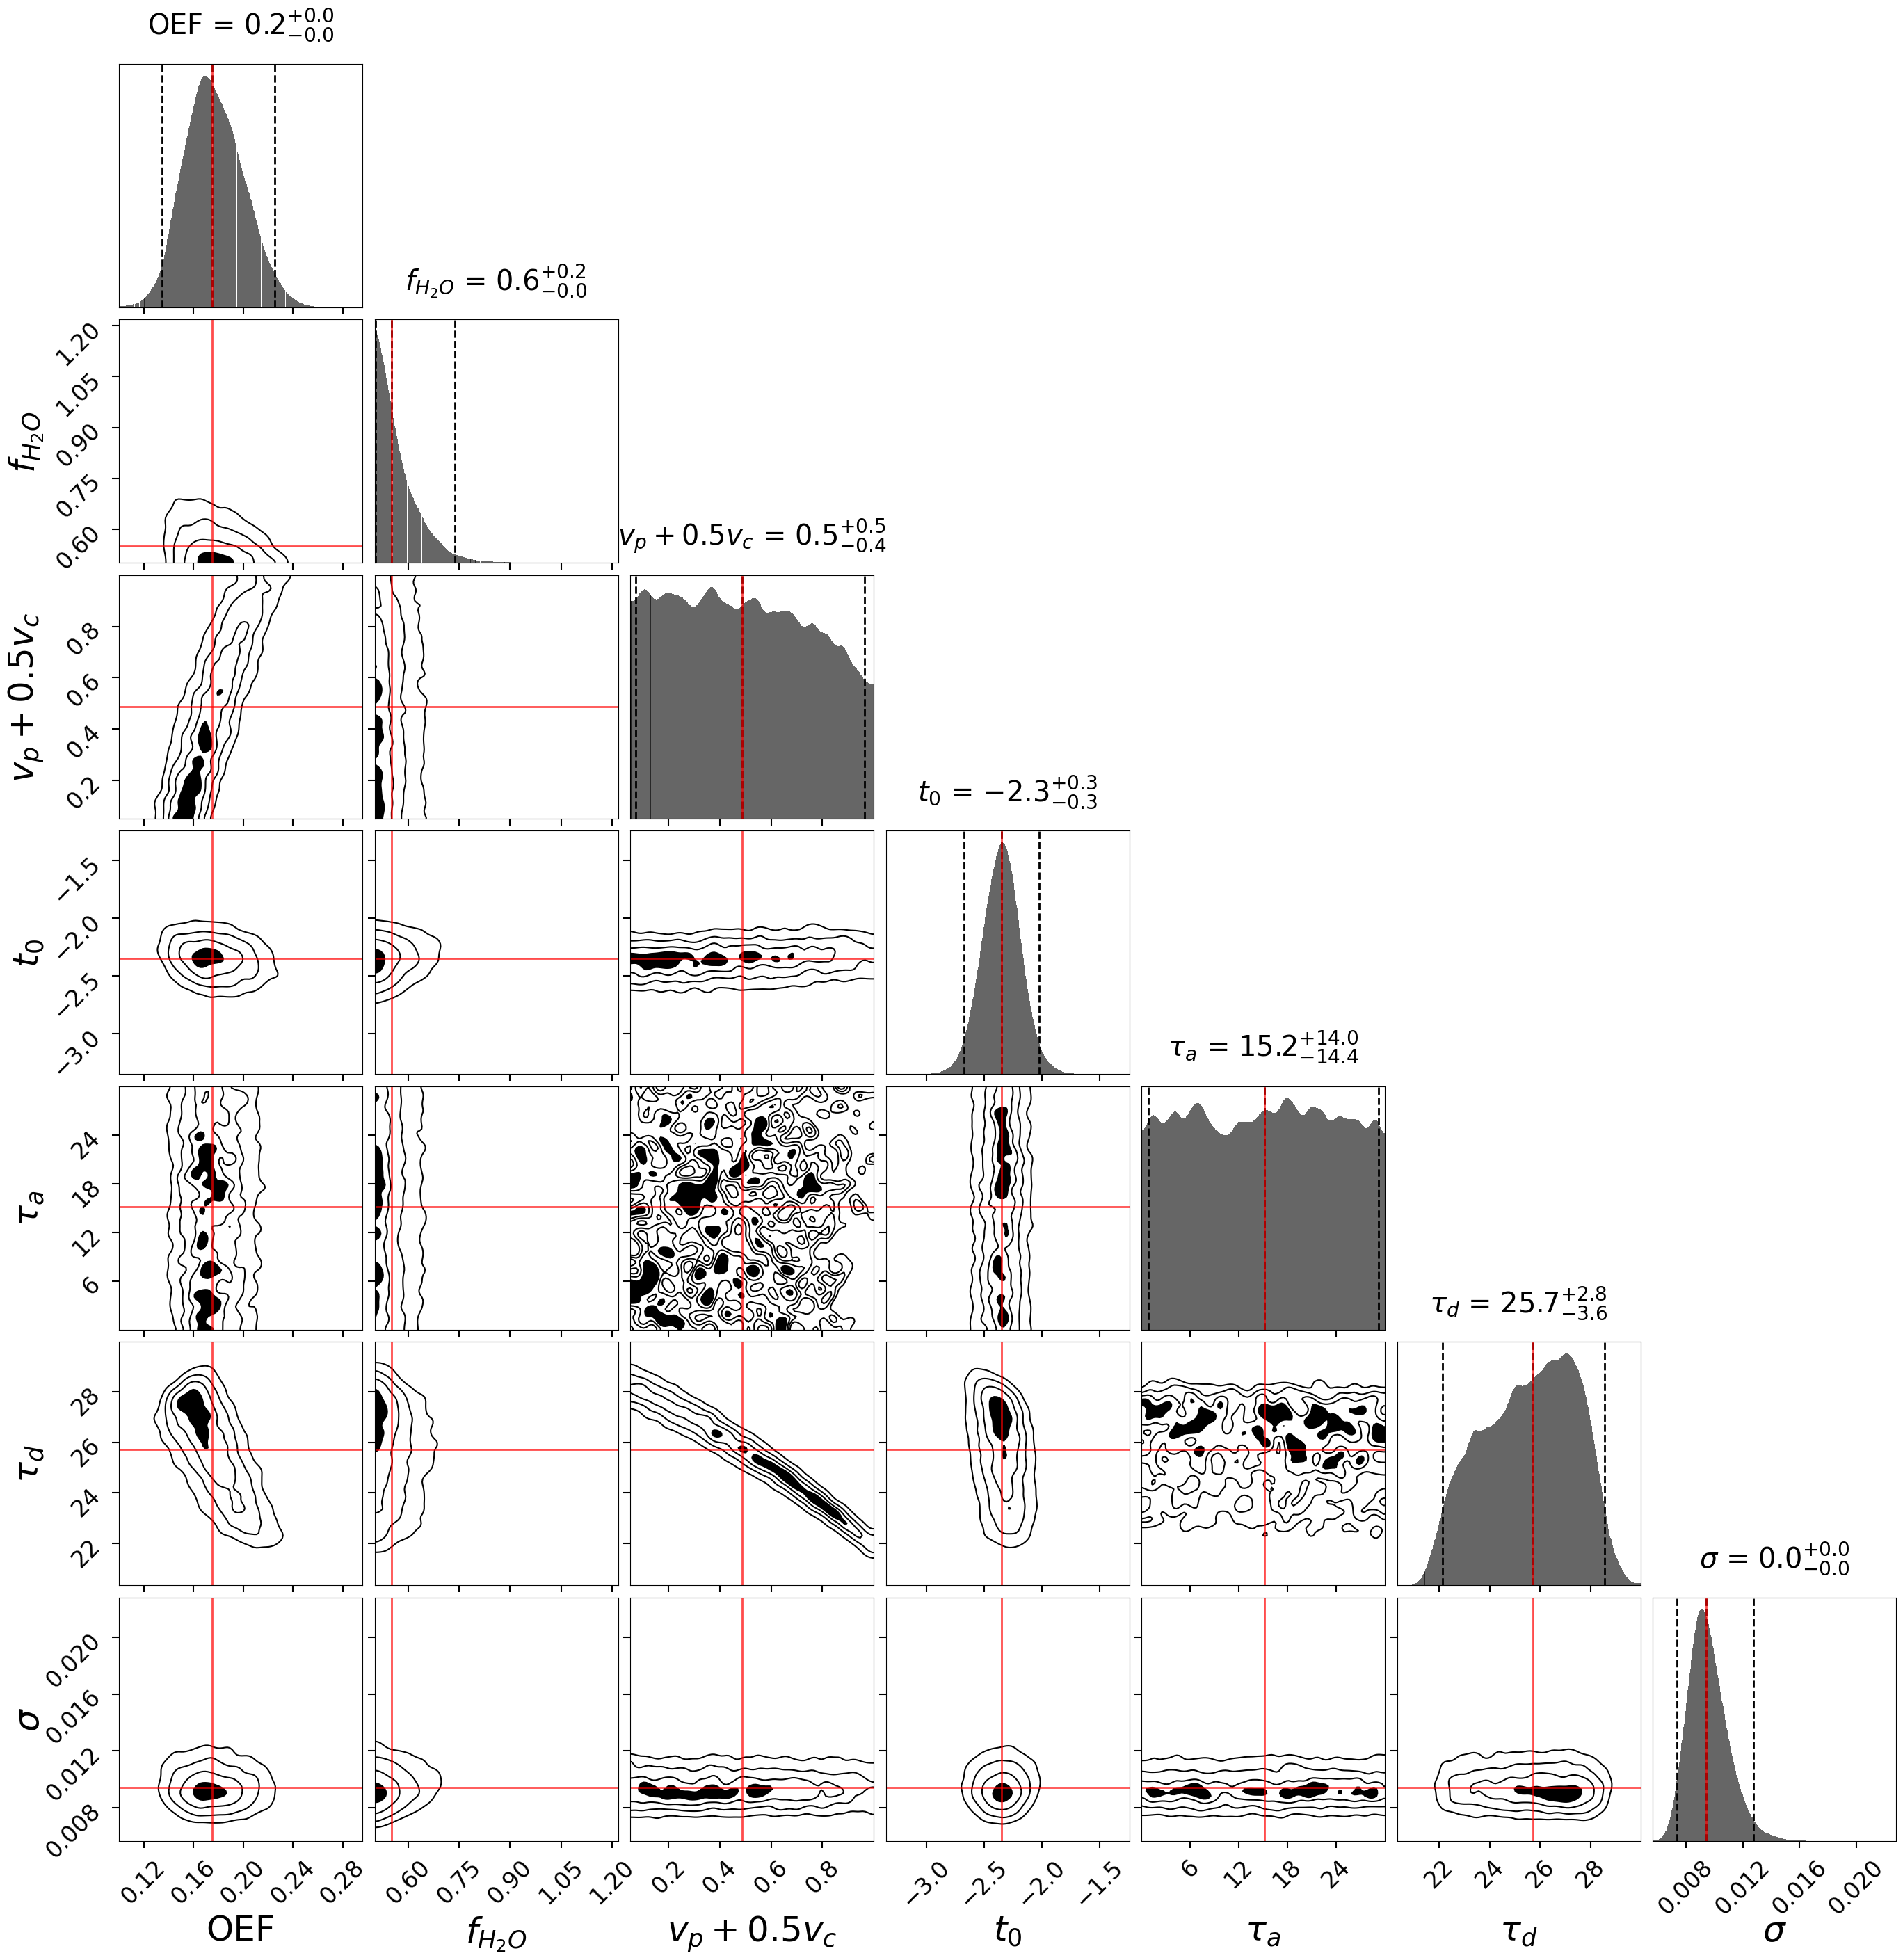

In [10]:
mm_idif.plotting.results_plot(tag="playground_mintun1984_idif", parc_index=9)

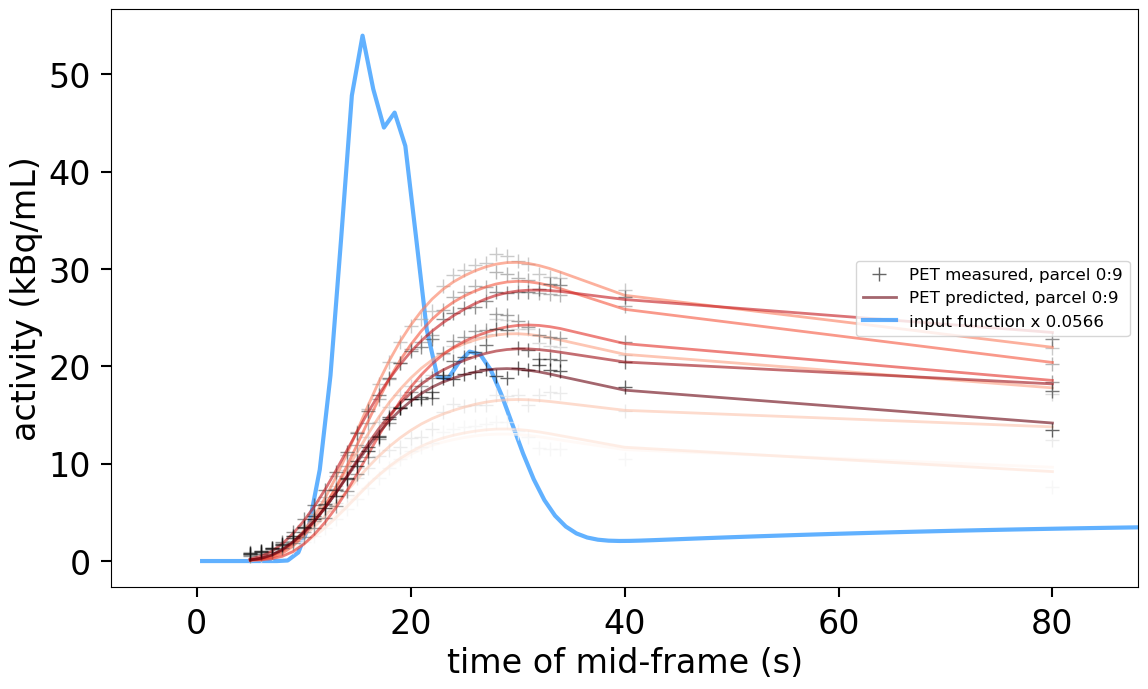

In [11]:
mm_idif.plotting.parcs_plot()

In [12]:
mm_twil.data.print_truths()
mm_idif.data.print_truths()



=============================== Truths ===============================
Parameter                        Value
----------------------------------------

Row 0:
OEF                            0.56412
$f_{H_2O}$                     0.69916
$v_p + 0.5 v_c$                0.48788
$t_0$                          7.90634
$\tau_a$                      15.29422
$\tau_d$                       6.14082
$\sigma$                       0.02421

Row 1:
OEF                            0.71297
$f_{H_2O}$                     0.91100
$v_p + 0.5 v_c$                0.36449
$t_0$                          8.56892
$\tau_a$                      14.90867
$\tau_d$                       6.46113
$\sigma$                       0.02930

Row 2:
OEF                            0.46089
$f_{H_2O}$                     0.59856
$v_p + 0.5 v_c$                0.73181
$t_0$                          7.63436
$\tau_a$                      14.80820
$\tau_d$                       6.73261
$\sigma$                       0.02237

Row

In [13]:
pprint(mm_twil.solver.truths)
pprint(mm_idif.solver.truths)

array([[ 0.56411904,  0.69915579,  0.48788089,  7.90634494, 15.29421972,
         6.14082082,  0.02421038],
       [ 0.71297045,  0.91099522,  0.36448998,  8.56892313, 14.90866933,
         6.46113119,  0.02930357],
       [ 0.46089373,  0.59856344,  0.73180646,  7.63436387, 14.80820395,
         6.73260931,  0.02236602],
       [ 0.54630723,  0.66761884,  0.6759571 ,  8.29653656, 15.07074948,
         5.44462317,  0.03574003],
       [ 0.58746253,  0.74082936,  0.65024142,  8.81309252, 15.10472467,
         6.11372419,  0.05101402],
       [ 0.52873391,  0.68698366,  0.66258975,  9.23092628, 15.09167649,
         5.62378754,  0.04498944],
       [ 0.55612664,  0.68314019,  0.71678997,  9.15883   , 15.00725112,
         5.22904334,  0.03361654],
       [ 0.55987191,  0.65920295,  0.79522746,  7.19483829, 15.08193952,
         6.03389573,  0.03246981],
       [ 0.56990989,  0.67348799,  0.71569971,  8.21916986, 14.98058373,
         4.68538335,  0.03116091],
       [ 0.50663261,  0.6438